<a href="https://colab.research.google.com/github/sebarom06/econ3916-statsml/blob/main/Lab08/Lab08_Hy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Treated: $6349.14
Mean Control: $6984.17

Treatment Effect (Signal): $-635.03
T-Statistic (Signal/Noise): -0.9377
P-Value: 0.3491
Fail to Reject Null: Result could be due to chance.

Permutation P-Value: 0.3348
Compare this to your T-test P-value. Are they consistent?


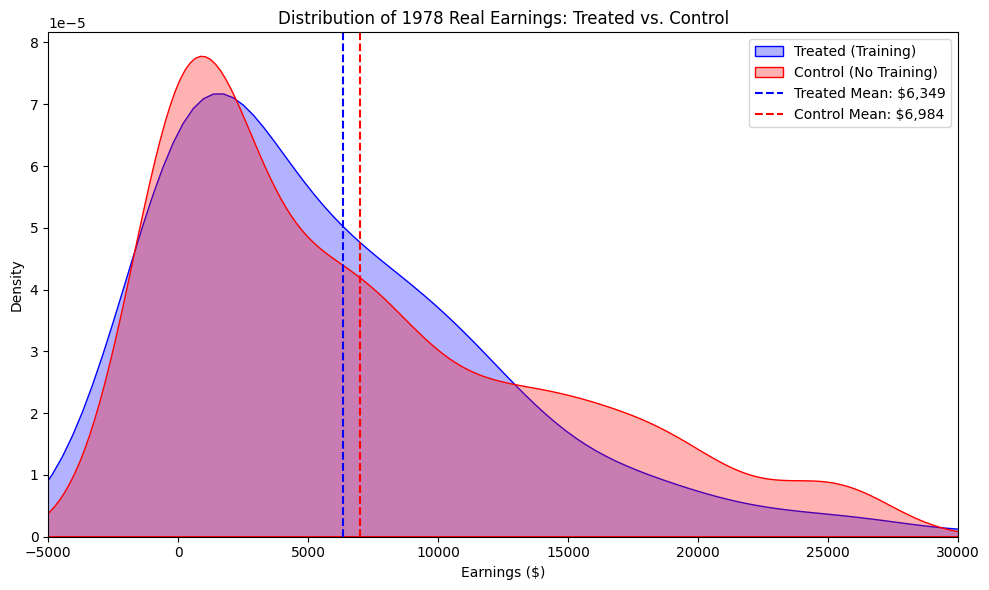

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data (Lalonde Experimental Subset)
df = pd.read_csv('lalonde.csv')

# 2. Split Groups
# treat = 1 (Received Training), treat = 0 (Control)
treated = df[df['treat'] == 1]['re78']
control = df[df['treat'] == 0]['re78']

# Inspect the raw means (The "Economic Reality")
print(f"Mean Treated: ${treated.mean():.2f}")
print(f"Mean Control: ${control.mean():.2f}")

# 3. Calculate Signal (Difference in Means)
signal = treated.mean() - control.mean()

# 4. Calculate Noise (T-Test)
# We use equal_var=False (Welch's T-Test) to account for unequal variances
t_stat, p_val = stats.ttest_ind(treated, control, equal_var=False)

print(f"\nTreatment Effect (Signal): ${signal:.2f}")
print(f"T-Statistic (Signal/Noise): {t_stat:.4f}")
print(f"P-Value: {p_val:.4f}")

# Decision Rule (Alpha = 0.05)
if p_val < 0.05:
    print("Reject Null: The training has a statistically significant effect.")
else:
    print("Fail to Reject Null: Result could be due to chance.")

# 5. Define the test statistic function for Permutation Test
def difference_in_means(x, y):
    return x.mean() - y.mean()

# 6. Run Permutation Test (10,000 Resamples)
# This simulates "What if the treatment labels were meaningless?"
res = stats.permutation_test(
    (treated, control),
    difference_in_means,
    permutation_type='independent',
    n_resamples=10000,
    alternative='two-sided'
)

print(f"\nPermutation P-Value: {res.pvalue:.4f}")
print("Compare this to your T-test P-value. Are they consistent?")

# 7. Visualization
plt.figure(figsize=(10, 6))

# Plot KDE for both groups
sns.kdeplot(treated, fill=True, label='Treated (Training)', color='blue', alpha=0.3)
sns.kdeplot(control, fill=True, label='Control (No Training)', color='red', alpha=0.3)

# Add vertical lines for group means
plt.axvline(treated.mean(), color='blue', linestyle='--', linewidth=1.5,
            label=f'Treated Mean: ${treated.mean():,.0f}')
plt.axvline(control.mean(), color='red', linestyle='--', linewidth=1.5,
            label=f'Control Mean: ${control.mean():,.0f}')

plt.title('Distribution of 1978 Real Earnings: Treated vs. Control')
plt.xlabel('Earnings ($)')
plt.xlim(-5000, 30000)
plt.legend()
plt.tight_layout()
plt.show()